## Этап 1: Знакомство с данными и предобработка<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/alekseyfedko/Desktop/prefabricated_project_1/games.csv')
df.columns = df.columns.str.lower()

df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y')
df['year_of_release'] = pd.DatetimeIndex(df['year_of_release']).year

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
tbd = df.query('user_score == "tbd"')

#df['year_of_release'] = df['year_of_release'].fillna(0)

 #привёл год к datetime


df.query('critic_score % 1 != 0 & critic_score != "NaN"') #проверил может ли в рейтинг быть не целым числом
#
#df['year_of_release'] = df['year_of_release'].astype('int')
#df['user_score'] = df['user_score'].astype('float')
df.duplicated().sum()
df.dropna(subset = ['name'], inplace = True)
df['critic_score'] = df['critic_score'].fillna(0)
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].fillna(0)
df['user_score'] = df['user_score'].replace('tbd', 0)
df['user_score'] = df['user_score'].astype('float')

df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
 11  sum_sales        16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


## Работа и выводы по этапу 1

Привёл year_of_release к int - очевидно, что значение должно быть целым. До этого NaN заменил на 0.  
Проверил на дубликаты - их нет.  
Удалил 2 пустые строки.  
Привёл critic_score к int. До этого проверил, встречаются ли дробные значения, а также есть ли значения выше 100.  
Привёл user_score к float, поскольку встречаются дробные числа.
В столбце user_score встретилось значение 'dbt', которое означение To be determined (с англ. предстоит определиться).   
По факту dbt означает отсутствие рейтинга, поэтому заменил эти значения на 0. Была гипотиза, что это значение может   
выставляться для новых игр. Но группировка по годам показал расброс с 1997 по 2016.  
tbd заменил на 0 методом replace().

В столбце rating пропуски заменены не были, поскольку речь идёт о категоризации по возрастному принципу и на текущем   
этапе нет подходящей замены.

Причинами появления пропусков могут стать:  
- ошибка данных.  
- игра слишком старая или слишком новая.
  
Суммарные продажи посчитаны и записаны в столбец sum_sales.  

## Этап 2: Исследовательский анализ данных   


Text(0.5, 1.0, 'Распределение вышедших игр по годам среди всех платформ')

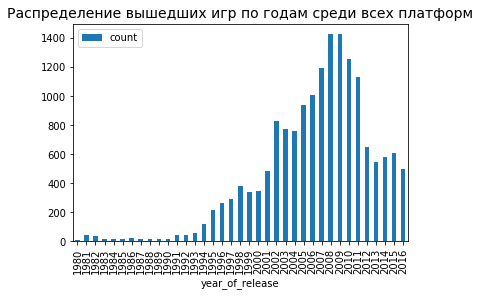

In [3]:
quantity_per_year = df.groupby('year_of_release')[
    'name'].count().reset_index().sort_values(by = 'name', ascending = False)
quantity_per_year.columns = ['year_of_release', 'count']
quantity_per_year['year_of_release'] = quantity_per_year['year_of_release'].astype('int')
quantity_per_year.sort_values(
    by='year_of_release').plot(x ='year_of_release', y='count', kind="bar")
plt.title('Распределение вышедших игр по годам среди всех платформ', fontsize=14)



##### Очевидно, что количество игр от года в год только растёт. До 2000 года данных мало. 


In [4]:
sum_sales_platforms = df.pivot_table(
    index='platform',values='sum_sales',aggfunc='sum').reset_index().sort_values('sum_sales',ascending=False)
top_platforms = sum_sales_platforms.query('sum_sales > 200')

top_platforms


,platform,sum_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [5]:
top_platform_data = df[df['platform'].isin(top_platforms['platform'])].copy()
top_platform_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38


Text(0.5, 1.0, 'Распределение по суммарным продажам среди ТОП-16 платформ')

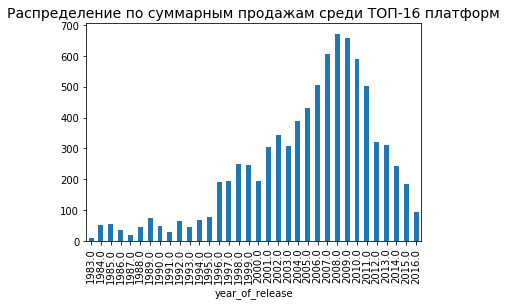

In [6]:
top_per_year = top_platform_data.groupby('year_of_release')['name'].count().reset_index()
top_platform_data.groupby('year_of_release')['sum_sales'].sum().plot(kind="bar")
plt.title('Распределение по суммарным продажам среди ТОП-16 платформ', fontsize=14)



,platform,life_time
0,2600,9.0
1,3DO,1.0
2,3DS,5.0
3,DC,10.0
4,DS,28.0
5,GB,13.0
6,GBA,7.0
7,GC,6.0
8,GEN,4.0
9,GG,0.0


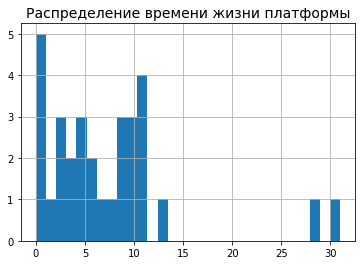

In [7]:
data_life_time = df.groupby('platform')['year_of_release'].max() - df.groupby('platform')['year_of_release'].min()
data_life_time = data_life_time.reset_index()
data_life_time.columns = ['platform', 'life_time']
data_life_time.hist(bins= 30)
plt.title('Распределение времени жизни платформы', fontsize=14)
data_life_time

#### Выводы по времени жизни платформы. 
Время жизни платформы в данном случае представлено в виде разницы между датой релиза самой новой игры и самой старой.  
Распределение показывается, что платформы можно условно разделить на 3 категории:
Период активности до 5-6 лет.  
Период активности 10-11 лет.  
Период активности 28-30 лет.  


In [8]:
top_platform_data['sum_sales'].describe()


count    14917.000000
mean         0.552313
std          1.617532
min          0.000000
25%          0.060000
50%          0.170000
75%          0.490000
max         82.540000
Name: sum_sales, dtype: float64

Text(0.5, 1.0, 'Распределение по суммарным продажам среди ТОП-16 платформ с 2000 года')

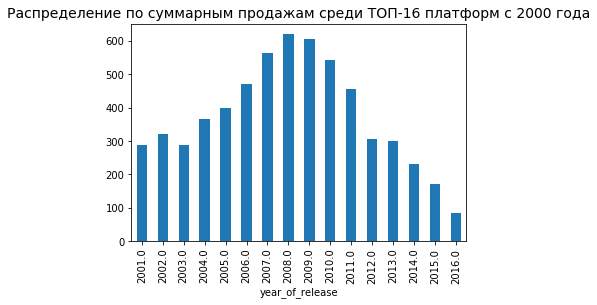

In [9]:
good_top = top_platform_data.query('year_of_release > 2000 & sum_sales > 0.17') 
#таблица свежими данными и успещными проектами. Для прогноза успеха нужны классные проекты

good_top.groupby('year_of_release')['sum_sales'].sum().plot(kind="bar")
plt.title('Распределение по суммарным продажам среди ТОП-16 платформ с 2000 года', fontsize=14)

Text(0.5, 1.0, 'Динамика продаж ТОП-16 платформ с 2000 года')

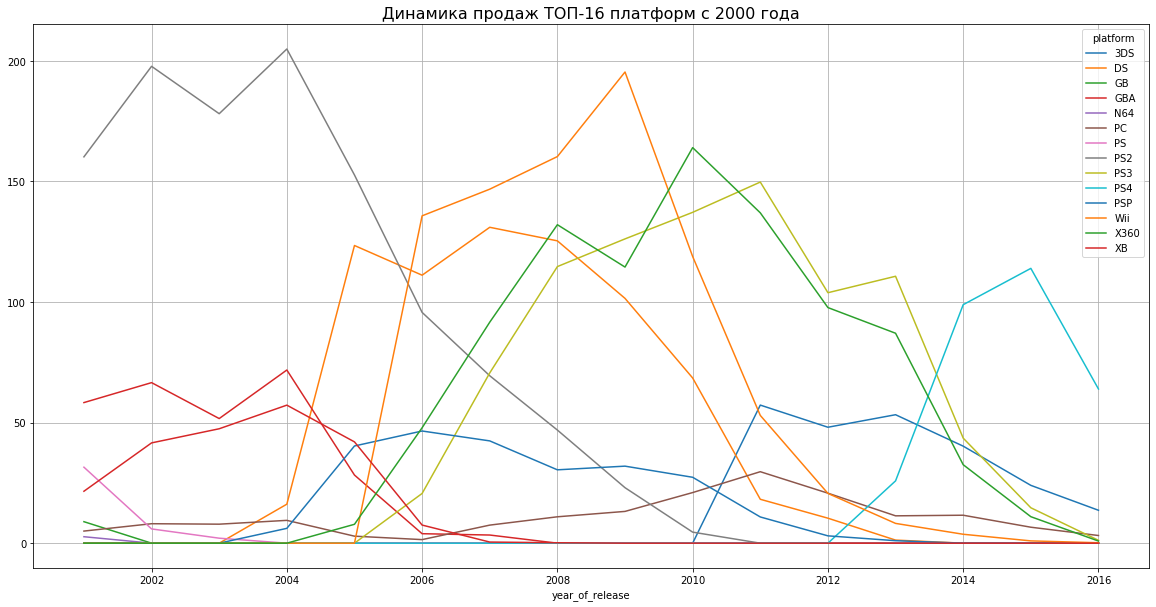

In [10]:
temp_good_top = good_top[['platform', 'year_of_release', 'sum_sales']]
platforms_gropuped = temp_good_top.groupby(['platform','year_of_release']).agg(['sum']).reset_index()
new_platforms_gropuped = temp_good_top.pivot_table(
    index=['year_of_release'],columns='platform', values = 'sum_sales', aggfunc = 'sum')

new_platforms_gropuped = new_platforms_gropuped.fillna(0)
new_platforms_gropuped.plot(figsize=(20, 10), grid=True)
plt.title('Динамика продаж ТОП-16 платформ с 2000 года', fontsize=16)

Отмечается общее снижение темпов прода.  
Однако график продаж по годам позволил выделить следующие платформы (у них есть хотя бы какие-то продажи после 2010 года):  
1) PS4.  
2) PS3.  
3) X360.  
4) 3DS.  
5) PSP.  
6) PC.


Попробуем актуализировать данные и выберем только те платформы, где есть продажи после 2014 выше, чем медиана.  

In [11]:
fresh_platforms = good_top.query('year_of_release > 2014 & sum_sales > 0.17')
fresh_platforms['platform'].unique()

array(['PS4', '3DS', 'PS3', 'X360', 'PC', 'Wii'], dtype=object)

Text(0.5, 1.0, 'Глобальные продажи игр с разбивкой по платформам')

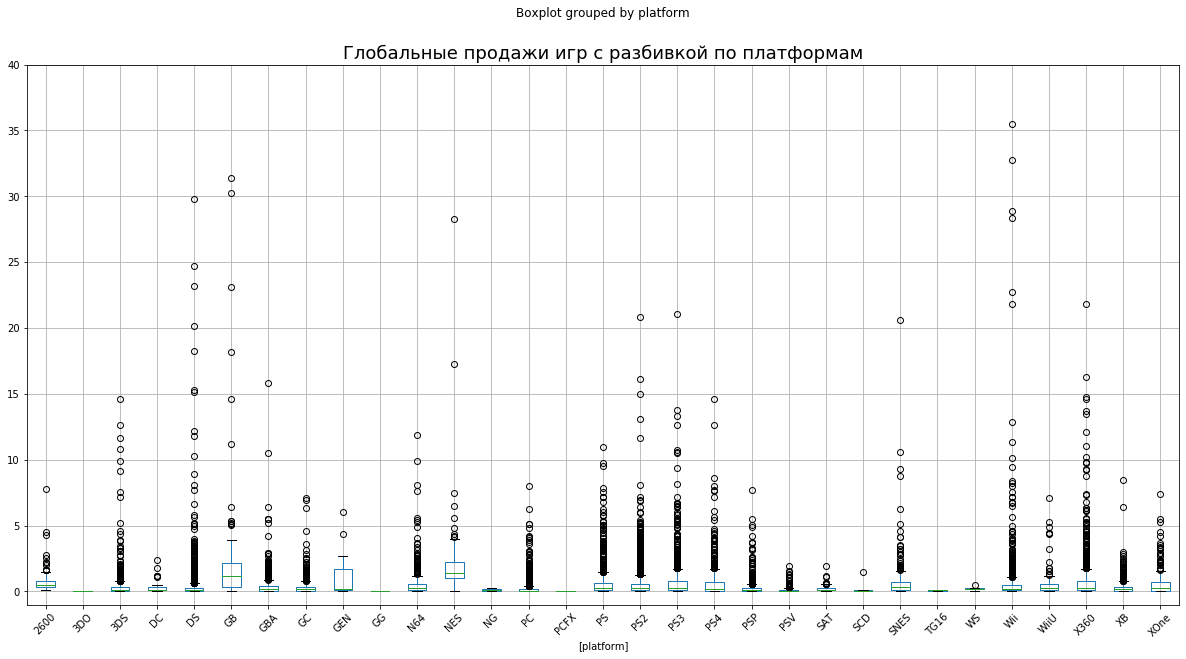

In [12]:
#games_data = df.pivot_table(index=['name'], values = 'sum_sales',aggfunc=['mean','median']).reset_index()

games_data = df[['name', 'platform', 'sum_sales']]
#games_data.boxplot()

games_data.boxplot(by = 'platform', rot=45,  figsize=(20, 10), grid=True)
plt.ylim(-1, 40)
plt.title('Глобальные продажи игр с разбивкой по платформам', fontsize=18)

Text(0.5, 1.0, 'Средний доход платформы с продаж игры')

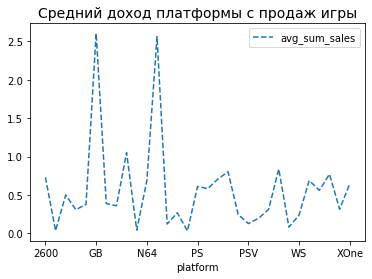

In [13]:
games_avg_sales = df.pivot_table(
    index=['platform'], values = 'sum_sales', aggfunc = 'mean').reset_index()
games_avg_sales.columns = ['platform', 'avg_sum_sales']
games_avg_sales.plot(x = 'platform', style='--')
plt.title('Средний доход платформы с продаж игры', fontsize=14)

#### Выводы по средним продажам и ящику с усами
Средний доход платформы с игры варьируется в пределах 1 млн.    
Бросаются в глаза игры, которые стали бестселлерами, но доход большинства сосредоточен в диапазоне до 5 млн.  
Платформы, на которые приходится большее количество выдающихся продаж: Wii, X360, PS2, PS3, PS4, GB, DS, 3DS   
Отмечу, что 'PS4', '3DS', 'PS3', 'X360', 'Wii' были выявлены на предыдущем шаге, как наиболее перспективные. 



In [14]:
top_names = ['PS4', '3DS', 'PS3', 'X360', 'Wii']
potential_platform = df.query('platform in @top_names')

In [15]:
score_corr_data = potential_platform[['name','platform','sum_sales','critic_score', 'user_score']]
corr_sales_critic_all = score_corr_data['sum_sales'].corr(score_corr_data['critic_score'])
corr_sales_user_all = score_corr_data['sum_sales'].corr(score_corr_data['user_score'])

corr_platforms_critic = score_corr_data.groupby(
    'platform')['sum_sales'].corr(score_corr_data['critic_score']).reset_index()
corr_platforms_critic.columns=['platform', 'corr_critic_score']
corr_platforms_user = score_corr_data.groupby(
    'platform')['sum_sales'].corr(score_corr_data['user_score']).reset_index()
corr_platforms_critic
corr_scores_sales = corr_platforms_critic.merge(corr_platforms_user, on='platform', how='left')
corr_scores_sales.columns=['platform', 'corr_critic_score', 'corr_user_score']

corr_scores_sales

,platform,corr_critic_score,corr_user_score
0,3DS,0.167239,0.149687
1,PS3,0.355066,0.274025
2,PS4,0.227550,0.113116
3,Wii,0.189498,0.186137
4,X360,0.311797,0.208900


#### Выводы по корреляции между оценками и суммарными продажами
Максимальная корреляция (0.35) обнаружена между оценками критиков и продажами PS3.  

Взаимосвязь между оценками и продажами присутствует, но она невелика.


Text(0.5, 1.0, 'Диаграмма рассеяния оценка пользователей/суммарные продажи PS4')

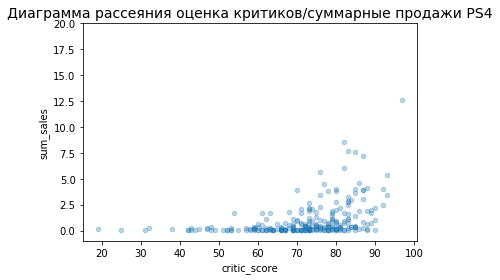

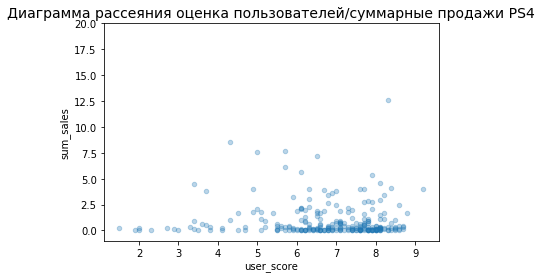

In [16]:
score_corr_data.query('platform == "PS4" & sum_sales > 0 & critic_score > 0').plot(x='critic_score',y='sum_sales',kind='scatter', alpha = 0.3)
plt.ylim(-1, 20)
plt.title('Диаграмма рассеяния оценка критиков/суммарные продажи PS4', fontsize=14)
score_corr_data.query('platform == "PS4" & sum_sales > 0 & user_score > 0').plot(x='user_score',y='sum_sales',kind='scatter', alpha = 0.3)
plt.ylim(-1, 20)
plt.title('Диаграмма рассеяния оценка пользователей/суммарные продажи PS4', fontsize=14)



#### Выводы по диаграммам рассеяния  PS4
Отмечаю, что бал критики выше 70 чаще соответствует игре с большими объёмом продаж.    
Оценки пользователей более расбиосаны. В отличие от критиков, пользователи могут плохо оценить игру, которая в конечном  
итоге будет хорошо продаваться.


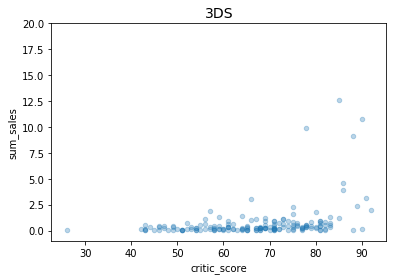

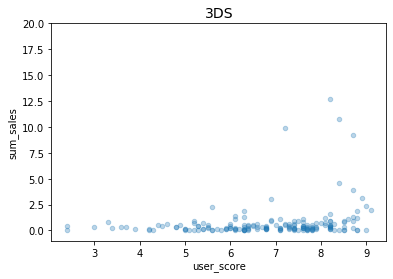

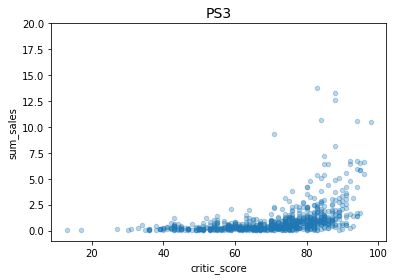

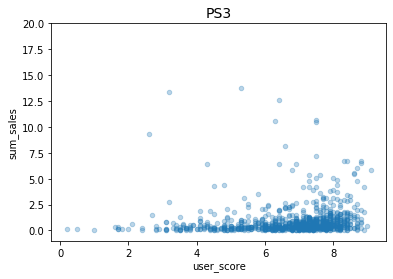

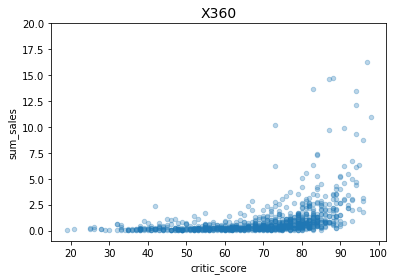

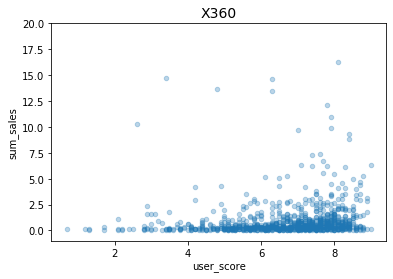

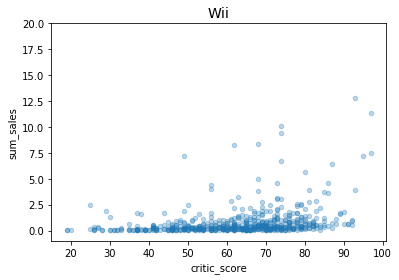

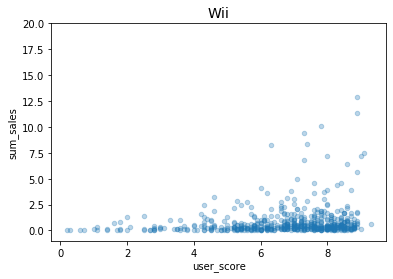

In [17]:
for i in top_names[1:]:
    score_corr_data.query('platform == @i & sum_sales > 0 & critic_score > 0').plot(x='critic_score',y='sum_sales',kind='scatter', alpha = 0.3)
    plt.ylim(-1, 20)
    plt.title(i, fontsize=14)
    score_corr_data.query('platform == @i & sum_sales > 0 & user_score > 0').plot(x='user_score',y='sum_sales',kind='scatter', alpha = 0.3)
    plt.ylim(-1, 20)
    plt.title(i, fontsize=14)
    
    

#### Выводы по другим платформам на основании диаграмм рассеяния:
Оценки пользователей и критиков довольно схожы у 3DS.   
Ситуация на PS3 схожа с PS4. Особенно в части оценик пользователей: иногда они дают низкие оценки прибыльные проекты.  
Для Wii ситуация обратная от PS3 и PS4: критики чаще дают негативную оценку играм, которые приносят большую прибыль.  


Text(0.5, 1.0, 'Количество игр и суммарные продажи по жанрам')

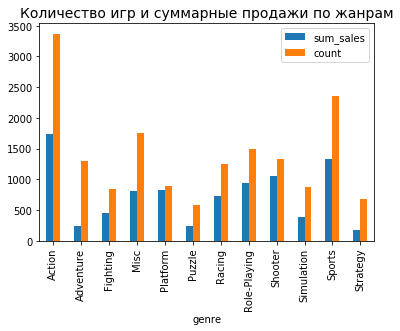

In [18]:
genres_data = df.pivot_table(
    index='genre', values='sum_sales', aggfunc=['sum', 'count']).reset_index()
genres_data.columns = ['genre', 'sum_sales', 'count']
genres_data.plot(x = 'genre', kind = 'bar')
plt.title('Количество игр и суммарные продажи по жанрам', fontsize=14)


#### Выводы по жанрам:
##### Жанры с наибольшим колиеством игра и самыми высокими продажами:  
1) Action.   
2) Sports.  
  
##### Жанры-аутсайдеры:  
1) Puzzle.  
2) Strategy.  
3) Simulation.  
4) Fighting.   
5) Platform.  


### Этап 3: Составляем портрет пользователя каждого региона  


In [19]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN,0.01


Text(0.5, 1.0, 'Распределение по жанрам в Японии')

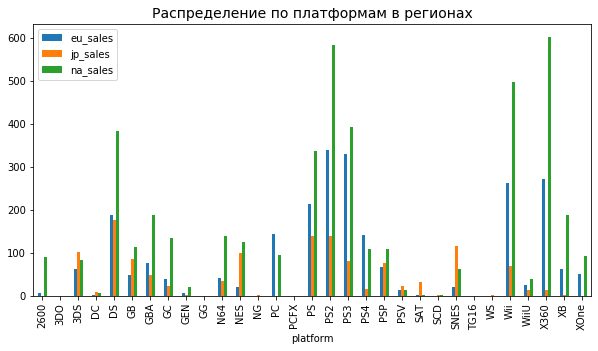

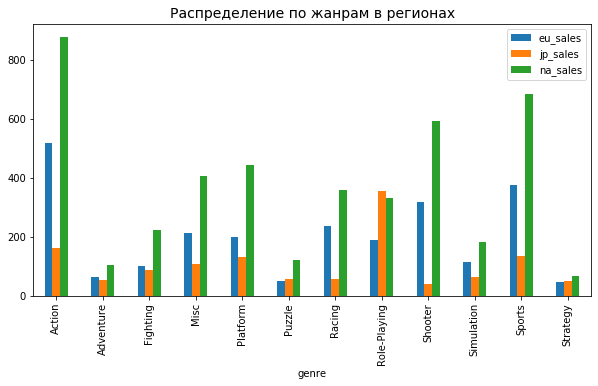

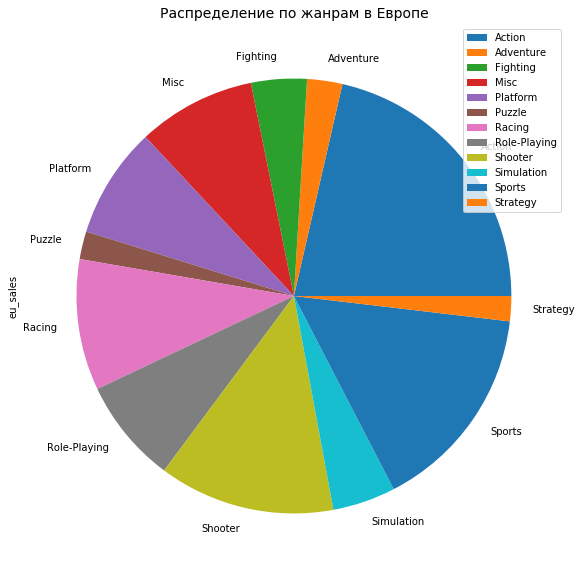

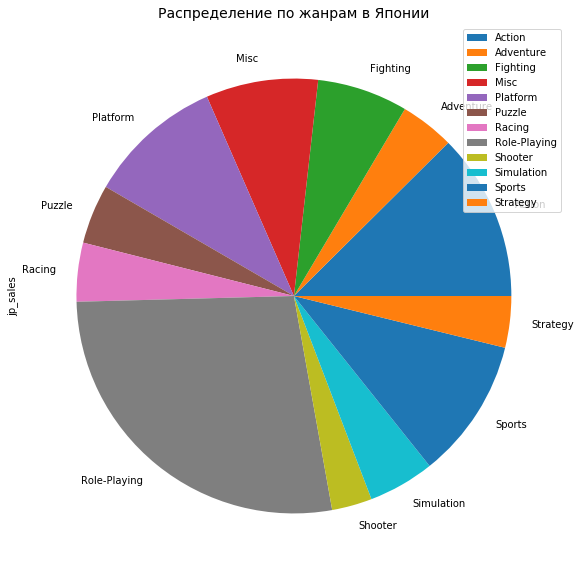

In [20]:
na_top_platforms = df.groupby(
    'platform')['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
eu_top_platforms = df.groupby(
    'platform')['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
jp_top_platforms = df.groupby(
    'platform')['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)

top_platforms_geo = df.pivot_table(index='platform',
               values= ['na_sales','eu_sales','jp_sales'],
               aggfunc=['sum'])

top_platforms_geo.columns = ['eu_sales','jp_sales','na_sales']
top_platforms_geo.plot(kind = 'bar', figsize=(10, 5))
plt.title('Распределение по платформам в регионах', fontsize=14)

top_genres_geo = df.pivot_table(index='genre',
               values= ['na_sales','eu_sales','jp_sales'],
               aggfunc=['sum'])
top_genres_geo.columns = ['eu_sales','jp_sales','na_sales']
top_genres_geo.plot(kind = 'bar', figsize=(10, 5))
plt.title('Распределение по жанрам в регионах', fontsize=14)

top_genres_geo.plot(kind = 'pie', x = 'genre', y = 'eu_sales', figsize=(10, 10))
plt.title('Распределение по жанрам в Европе', fontsize=14)

top_genres_geo.plot(kind = 'pie', x = 'genre', y = 'jp_sales', figsize=(10, 10))
plt.title('Распределение по жанрам в Японии', fontsize=14)




In [21]:
top_platforms_geo.sort_values(by= 'na_sales', ascending = False).head(5)
top_platforms_geo.sort_values(by= 'eu_sales', ascending = False).head(5)
top_platforms_geo.sort_values(by= 'jp_sales', ascending = False).head(5)

top_genres_geo.sort_values(by= 'na_sales', ascending = False).head(5)
top_genres_geo.sort_values(by= 'eu_sales', ascending = False).head(5)
top_genres_geo.sort_values(by= 'jp_sales', ascending = False).head(5)

top_genres_geo.sort_values(by= 'jp_sales', ascending = False).head(5)


,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,188.71,355.41,330.81
Action,519.13,161.43,879.01
Sports,376.79,135.54,684.43
Platform,200.35,130.83,445.50
Misc,212.74,108.11,407.27


#### Выводы по полурным жанрам и платформам в регионах
Самые популярные платформы в NA: X360, PS2, Wii, PS3, DS  
Самые популярные платформы в EU: PS2, PS3, X360, Wii, PS  
Самые популярные платформы в JP: DS, PS, PS2, SNES, 3DS  
  
Самые популярные жанры в NA: Action, Sports, Shooter, Platform, Misc  
Самые популярные жанры в EU: Action, Sports, Shooter, Racing, Misc  
Самые популярные жанры в JP: Role-Playing, Action, Sports, Platform, Misc  


Япония выделяется приверженностью собственным платформам, а также ролевым играми.  
Предпочтения Европы и Америки совпадают по топ-3 жанрам.

In [22]:
esrb_corr = df[['eu_sales','jp_sales','na_sales', 'rating']].copy()
esrb_corr['rating'] = esrb_corr['rating'].fillna('empty')
esrb_corr = esrb_corr.query('rating!="empty"')

Text(0.5, 1.0, 'Продажи в JP с учётом возрастного ценза')

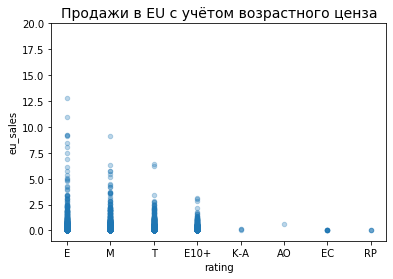

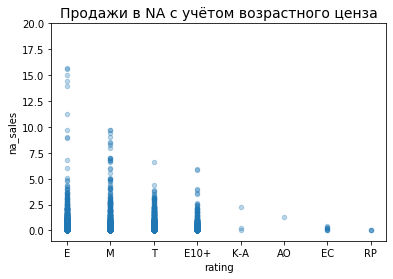

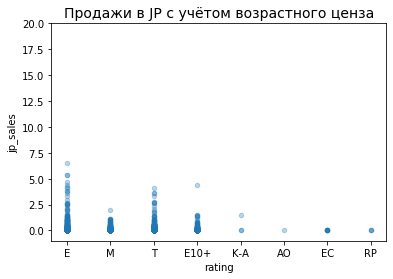

In [23]:
esrb_corr.plot(x='rating',y='eu_sales',kind='scatter', alpha = 0.3)
plt.ylim(-1, 20)
plt.title('Продажи в EU с учётом возрастного ценза', fontsize=14)

esrb_corr.plot(x='rating',y='na_sales',kind='scatter', alpha = 0.3)
plt.ylim(-1, 20)
plt.title('Продажи в NA с учётом возрастного ценза', fontsize=14)

esrb_corr.plot(x='rating',y='jp_sales',kind='scatter', alpha = 0.3)
plt.ylim(-1, 20)
plt.title('Продажи в JP с учётом возрастного ценза', fontsize=14)


In [24]:
esrb_corr['rating'].unique()

esrb_corr_numbers = esrb_corr

In [25]:
def change (data):
    if data['rating'] == 'E':
        return 1
    if data['rating'] == 'M':
        return 2
    if data['rating'] == 'T':
        return 3
    if data['rating'] == 'E10+':
        return 4
    if data['rating'] == 'K-A':
        return 5
    if data['rating'] == 'AO':
        return 6
    if data['rating'] == 'EC':
        return 7
    if data['rating'] == 'RP':
        return 0

esrb_corr_numbers['rating'] =  esrb_corr_numbers.apply(change, axis = 1)


In [26]:
esrb_corr_numbers.corr()

,eu_sales,jp_sales,na_sales,rating
eu_sales,1.000000,0.520008,0.836955,-0.036967
jp_sales,0.520008,1.000000,0.468033,-0.017466
na_sales,0.836955,0.468033,1.000000,-0.043233
rating,-0.036967,-0.017466,-0.043233,1.000000


#### Выводы по зависимости между возрастной категорией и продажами  
Корреляции между рейнтингом (буквенное обозначение было заменено на цифровое) и продажами нет.  
Однако распределение показывает, что наибольшие продажи в категории E, то есть без ограничения.  
Отмечен относительно NA и EU низкий объём продаж игр категории M (для лиц старше 17 лет) в JP.  


## Этап 4: Проверка гипотез  
Гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.  

In [67]:
from scipy import stats as st

df['platform'].unique()
xbox_one = df.query('platform == "XOne"')
avg_user_score_xbox = xbox_one['user_score'].mean()
user_score_xbox = xbox_one['user_score']

pc = df.query('platform == "PC"')
avg_user_score_pc = pc['user_score'].mean()
user_score_pc = pc['user_score']

alpha = .05

results_score = st.ttest_ind(
    user_score_xbox, 
    user_score_pc,
    equal_var = True)

print('p-значение:', results_score.pvalue)

if (results_score.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.0005833414469972175
Отвергаем нулевую гипотезу


##### Нулевая гипотеза во заданию сравнения средних оценок пользователей для xbox one и pc сформулирована так:
Средние генеральных совокупностей пользовательских оценок для xbox one и pc равны между собой.  

##### Альтернативная гипотеза:  
Среднее пользовательских оценок xbox one не равно среднему пользовательских оценок pc.  

В качестве критерия оценки использовался Критерий согласия.


In [62]:
action_df = df.query('genre == "Action"')
user_croce_action = action_df['user_score']
sports_df = df.query('genre == "Sports"')
user_croce_sports = sports_df['user_score']

results_score_genres = st.ttest_ind(
    user_croce_action, 
    user_croce_sports,
    equal_var = True)

print('p-значение:', results_score_genres.pvalue)

if (results_score_genres.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 1.1944013786844029e-08
Отвергаем нулевую гипотезу


##### Нулевая гипотеза во заданию сравнения средних оценок пользователей для Action и Sports сформулирована так:
Средние генеральных совокупностей пользовательских оценок для Action и Sports равны между собой. 

##### Альтернативная гипотеза:  
Среднее пользовательских оценок Action не равно среднему пользовательских оценок Sports.

В качестве критерия оценки использовался Критерий согласия.

In [69]:

results_action_sports = st.ttest_1samp(
    user_croce_action, 
    user_croce_sports.mean())

print('p-значение:', results_action_sports.pvalue)

if (results_action_sports.pvalue/ 2 < alpha) and (user_croce_action.mean() < user_croce_sports.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0070813280264403e-18
Не получилось отвергнуть нулевую гипотезу


##### Нулевая гипотеза во заданию сравнения средних оценок пользователей для Action и Sports сформулирована так:
Среднее генеральной совокупности пользовательских оценок для Action больше средней Sports. 

##### Альтернативная гипотеза:  
Среднее пользовательских оценок Sports больше, чем среднее пользовательских оценок Action.

В качестве критерия оценки использовался Критерий согласия.

## Общие выводы по проекту  
1) Наибольший пик активности по производству игр и объёмам продаж наблюдался до 2008-2009 г.г.  
2) Спад индустрии можно связать с финансовым кризисом, а также выбытием устаревших платформ.  
3) По времени жизни платформы можно разделить на 3 вида: пятилетки, десятилетки и "мамонты".  
4) В качестве потенциально успшеныъ платформ были выбраны: 'PS4', '3DS', 'PS3', 'X360', 'Wii'.  
5) Наибольшим потенциалом роста, на мой взгляд, обладает PS4, поскольку она принадлежит к серии PS.  
Предыдущие верссии этой консоли имели отличные результаты в свои циклы жизни. Но сейчас на них отмечается спад.  
6) Оценку критиков нельзя назвать предопределяющим фактором при прогнозировании объёмов продаж,  
однако они более точны, в отличие от пользователей.  
7) Пользователи чаще ставят низкие оценки проектам, которые могут принести большую прибыль.  
Объясняется банальной вкусовщиной и необъективностью.    
8) Европа и Америка достаточно похожи во вкусах по платформам и жанрам. Выделяется Япония, где  
предпочтение отдают консолям собственного производства, а также жанру игр, связанному с развитием персонажа, сражениями  
с холодным оружием (РПГ). Здесь свою роль сыграла японская культура и традции: стремление к росту, служению компании/хозяину,  
заниматься боевыми искуствами.  
9) Самыми прибыльными жанрами стали Action и Sports. Полагаю, что люди платят за эмоции, которые они получают  
в избытке именно из этих игр.  
10) Возрастной ценз от ESRB может сократить целевую аудиторию.  
11) Результаты проверки гипотез отражены выше.  
